In [3]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
def loadData():
    data = pd.read_csv('prima-indians-diabetes.csv', header=None)
    return data

data1 = loadData()
data = data1

In [5]:
data1.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.corr()

,0,1,2,3,4,5,6,7,8
0,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
1,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
2,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
3,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
4,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
5,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
6,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
7,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
8,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


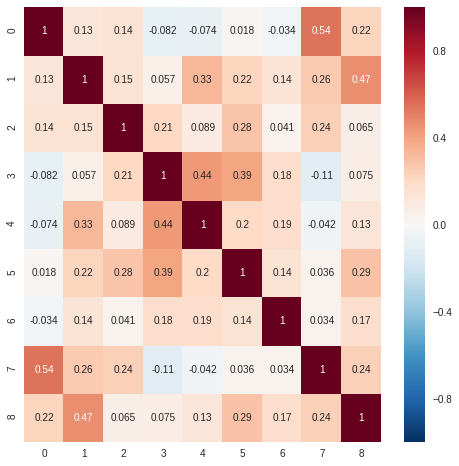

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True)

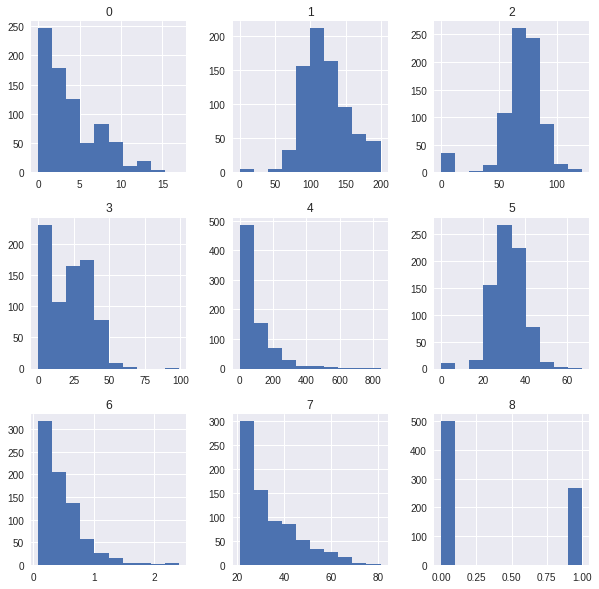

In [8]:
data.hist(figsize=(10,10))
plt.show()

# from this plot I can note that the data is unbalanced(500 of 0 and arround 260 of 1)

# prediction with unbalanced data

# spliting data

In [9]:
target = pd.DataFrame(data[8], columns=[8])
data = data.drop([8], axis=1)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.25, random_state=5)

In [14]:
xtrain, xtest = np.array(xtrain), np.array(xtest)
ytrain, ytest = np.array(ytrain), np.array(ytest)
# ytrain = ytrain.reshape(1,0)
# ytest = ytest.reshape(1,0)

In [15]:
xtrain.shape, xtest.shape, ytrain.shape

((576, 8), (192, 8), (576, 1))

# crate my model with keras

In [16]:
myModel = Sequential()
myModel.add(Dense(15, input_dim=8, activation='relu'))
myModel.add(Dense(10, activation='relu'))
myModel.add(Dense(8, activation='relu'))
myModel.add(Dense(1, activation='sigmoid'))  ##in order to output a value between 0 and 1
myModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 392
Trainable params: 392
Non-trainable params: 0
_________________________________________________________________


In [17]:
# compile the model, adam gradient descent (optimized)
myModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

##checkpoint
checkpoint = ModelCheckpoint('weights.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# call the function to fit to the data (training the network)
history = myModel.fit(xtrain, ytrain, epochs = 200, batch_size=20, validation_split=0.1, callbacks=callbacks_list)

Train on 518 samples, validate on 58 samples
Epoch 1/200
518/518 [==============================] - 0s 414us/step - loss: 1.6680 - acc: 0.6178 - val_loss: 1.0878 - val_acc: 0.6897
Epoch 2/200
518/518 [==============================] - 0s 48us/step - loss: 1.2534 - acc: 0.6178 - val_loss: 0.9757 - val_acc: 0.6552
Epoch 3/200
518/518 [==============================] - 0s 50us/step - loss: 1.0442 - acc: 0.6313 - val_loss: 0.8388 - val_acc: 0.6724
Epoch 4/200
518/518 [==============================] - 0s 58us/step - loss: 0.9240 - acc: 0.6409 - val_loss: 0.7486 - val_acc: 0.6724
Epoch 5/200
518/518 [==============================] - 0s 51us/step - loss: 0.8622 - acc: 0.6467 - val_loss: 0.7263 - val_acc: 0.7069
Epoch 6/200
518/518 [==============================] - 0s 63us/step - loss: 0.7877 - acc: 0.6602 - val_loss: 0.7878 - val_acc: 0.7241
Epoch 7/200
518/518 [==============================] - 0s 61us/step - loss: 0.8241 - acc: 0.6448 - val_loss: 0.6879 - val_acc: 0.7241
Epoch 8/200
518/

518/518 [==============================] - 0s 45us/step - loss: 0.5056 - acc: 0.7548 - val_loss: 0.5432 - val_acc: 0.7586
Epoch 62/200
518/518 [==============================] - 0s 46us/step - loss: 0.5248 - acc: 0.7490 - val_loss: 0.5541 - val_acc: 0.7586
Epoch 63/200
518/518 [==============================] - 0s 54us/step - loss: 0.5102 - acc: 0.7471 - val_loss: 0.5605 - val_acc: 0.7241
Epoch 64/200
518/518 [==============================] - 0s 47us/step - loss: 0.5146 - acc: 0.7548 - val_loss: 0.5535 - val_acc: 0.7241
Epoch 65/200
518/518 [==============================] - 0s 53us/step - loss: 0.5157 - acc: 0.7587 - val_loss: 0.5462 - val_acc: 0.7414
Epoch 66/200
518/518 [==============================] - 0s 47us/step - loss: 0.5407 - acc: 0.7490 - val_loss: 0.5328 - val_acc: 0.7414
Epoch 67/200
518/518 [==============================] - 0s 48us/step - loss: 0.5046 - acc: 0.7587 - val_loss: 0.5304 - val_acc: 0.7069
Epoch 68/200
518/518 [==============================] - 0s 47us/step

518/518 [==============================] - 0s 48us/step - loss: 0.4861 - acc: 0.7587 - val_loss: 0.5025 - val_acc: 0.7414
Epoch 122/200
518/518 [==============================] - 0s 46us/step - loss: 0.4861 - acc: 0.7625 - val_loss: 0.5141 - val_acc: 0.6897
Epoch 123/200
518/518 [==============================] - 0s 58us/step - loss: 0.4919 - acc: 0.7625 - val_loss: 0.5645 - val_acc: 0.7069
Epoch 124/200
518/518 [==============================] - 0s 50us/step - loss: 0.4932 - acc: 0.7587 - val_loss: 0.5104 - val_acc: 0.7069
Epoch 125/200
518/518 [==============================] - 0s 50us/step - loss: 0.4859 - acc: 0.7529 - val_loss: 0.5176 - val_acc: 0.7069
Epoch 126/200
518/518 [==============================] - 0s 69us/step - loss: 0.4678 - acc: 0.7819 - val_loss: 0.4947 - val_acc: 0.7241
Epoch 127/200
518/518 [==============================] - 0s 115us/step - loss: 0.4770 - acc: 0.7741 - val_loss: 0.5231 - val_acc: 0.7241
Epoch 128/200
518/518 [==============================] - 0s 8

518/518 [==============================] - 0s 53us/step - loss: 0.4547 - acc: 0.7780 - val_loss: 0.5431 - val_acc: 0.6724
Epoch 182/200
518/518 [==============================] - 0s 48us/step - loss: 0.4419 - acc: 0.7915 - val_loss: 0.5086 - val_acc: 0.7069
Epoch 183/200
518/518 [==============================] - 0s 45us/step - loss: 0.4492 - acc: 0.7838 - val_loss: 0.5700 - val_acc: 0.7241
Epoch 184/200
518/518 [==============================] - 0s 46us/step - loss: 0.4550 - acc: 0.7915 - val_loss: 0.5412 - val_acc: 0.7414
Epoch 185/200
518/518 [==============================] - 0s 47us/step - loss: 0.4647 - acc: 0.7703 - val_loss: 0.4944 - val_acc: 0.7069
Epoch 186/200
518/518 [==============================] - 0s 50us/step - loss: 0.4504 - acc: 0.7954 - val_loss: 0.5678 - val_acc: 0.7069
Epoch 187/200
518/518 [==============================] - 0s 46us/step - loss: 0.4493 - acc: 0.7838 - val_loss: 0.6453 - val_acc: 0.6897
Epoch 188/200
518/518 [==============================] - 0s 46

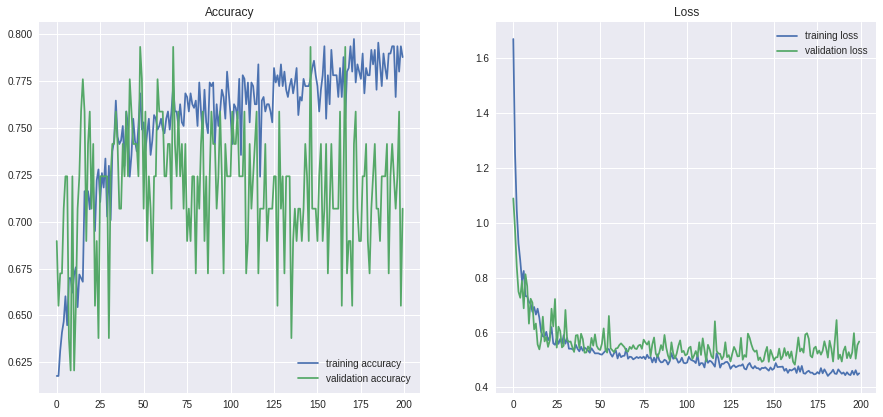

In [18]:
#plt.subplot(221)
f1 = plt.figure(figsize=(15,15))
# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=True)


#plt.close('all')
ax1.plot(history.history['acc'], label='training accuracy')
ax1.plot(history.history['val_acc'], label='validation accuracy')
ax1.set_title('Accuracy')
ax1.set_label
ax1.legend()

ax2.plot(history.history['loss'], label='training loss')
ax2.plot(history.history['val_loss'], label='validation loss')
ax2.set_title('Loss')
ax2.legend()

In [19]:
print(np.mean(history.history["val_acc"]))

0.7175862095582075


# Making prdiction on the test set

In [20]:
#y_pred = myModel.predict(xtest)
scores, accuracy = myModel.evaluate(xtest, ytest, verbose=0)
print('scores = ', scores)
print('accuracy = ', accuracy)

scores =  0.573948989311854
accuracy =  0.6979166666666666


# Training the model using earlier stopping

In [21]:
earlier_stopping = EarlyStopping(patience=10)
history1 = myModel.fit(xtrain, ytrain, validation_split=0.1, epochs=300, callbacks=[earlier_stopping])

Train on 518 samples, validate on 58 samples
Epoch 1/300
518/518 [==============================] - 0s 45us/step - loss: 0.4412 - acc: 0.7799 - val_loss: 0.5663 - val_acc: 0.7241
Epoch 2/300
518/518 [==============================] - 0s 35us/step - loss: 0.4494 - acc: 0.7896 - val_loss: 0.5326 - val_acc: 0.6897
Epoch 3/300
518/518 [==============================] - 0s 39us/step - loss: 0.4479 - acc: 0.7973 - val_loss: 0.4882 - val_acc: 0.7241
Epoch 4/300
518/518 [==============================] - 0s 38us/step - loss: 0.4368 - acc: 0.7838 - val_loss: 0.5079 - val_acc: 0.7414
Epoch 5/300
518/518 [==============================] - 0s 39us/step - loss: 0.4378 - acc: 0.7915 - val_loss: 0.5565 - val_acc: 0.7241
Epoch 6/300
518/518 [==============================] - 0s 42us/step - loss: 0.4325 - acc: 0.7915 - val_loss: 0.5268 - val_acc: 0.7586
Epoch 7/300
518/518 [==============================] - 0s 35us/step - loss: 0.4364 - acc: 0.7799 - val_loss: 0.5406 - val_acc: 0.7586
Epoch 8/300
518/5

In [22]:
print(np.mean(history1.history['val_acc']))

0.7318668274760386


In [23]:
scores, accuracy = myModel.evaluate(xtest, ytest, verbose=0)
print('scores = ', scores)
print('accuracy = ', accuracy)

scores =  0.5637381772200266
accuracy =  0.703125


# Data augmentation using upsampling

0    500
1    268
Name: 8, dtype: int64

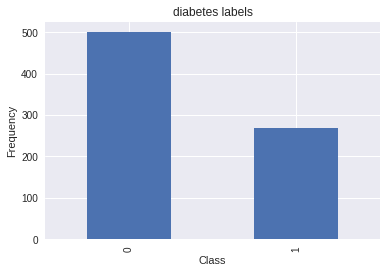

In [24]:
pd.value_counts(data1[8]).plot.bar()
plt.title('diabetes labels')
plt.xlabel('Class')
plt.ylabel('Frequency')
data1[8].value_counts()

In [156]:
!pip3 install imblearn

    100% |████████████████████████████████| 174kB 732kB/s ta 0:00:01
    100% |████████████████████████████████| 24.7MB 83kB/s eta 0:00:01    43% |█████████████▉                  | 10.7MB 590kB/s eta 0:00:24
    100% |████████████████████████████████| 5.3MB 236kB/s ta 0:00:01
    100% |████████████████████████████████| 17.2MB 110kB/s ta 0:00:01


In [25]:
from imblearn.over_sampling import SMOTE

In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(ytrain==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(ytrain==0)))

sm = SMOTE(random_state=2)
xtrain_smote, ytrain_smote = sm.fit_sample(xtrain, ytrain.ravel())

print('After OverSampling, the shape of train_X: {}'.format(xtrain_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(ytrain_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(ytrain_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(ytrain_smote==0)))

Before OverSampling, counts of label '1': [208]
Before OverSampling, counts of label '0': [368] 

After OverSampling, the shape of train_X: (736, 8)
After OverSampling, the shape of train_y: (736,) 

After OverSampling, counts of label '1': 368
After OverSampling, counts of label '0': 368


# Training the model with upsampling data

In [31]:
# compile the model, adam gradient descent (optimized)
myModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

##checkpoint
checkpoint = ModelCheckpoint('weights.best.hdf5', monitor='val_acc', save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# call the function to fit to the data (training the network)
history2 = myModel.fit(xtrain_smote, ytrain_smote, epochs = 200, batch_size=20, validation_split=0.1,
                      callbacks=callbacks_list)

Train on 662 samples, validate on 74 samples
Epoch 1/200
662/662 [==============================] - 0s 408us/step - loss: 0.4090 - acc: 0.7976 - val_loss: 0.4629 - val_acc: 0.8514
Epoch 2/200
662/662 [==============================] - 0s 47us/step - loss: 0.3936 - acc: 0.8082 - val_loss: 0.3955 - val_acc: 0.8649
Epoch 3/200
662/662 [==============================] - 0s 54us/step - loss: 0.3966 - acc: 0.8036 - val_loss: 0.3489 - val_acc: 0.8649
Epoch 4/200
662/662 [==============================] - 0s 59us/step - loss: 0.3951 - acc: 0.8112 - val_loss: 0.4927 - val_acc: 0.7162
Epoch 5/200
662/662 [==============================] - 0s 58us/step - loss: 0.3991 - acc: 0.8082 - val_loss: 0.4672 - val_acc: 0.7703
Epoch 6/200
662/662 [==============================] - 0s 49us/step - loss: 0.4058 - acc: 0.8127 - val_loss: 0.3644 - val_acc: 0.8649
Epoch 7/200
662/662 [==============================] - 0s 53us/step - loss: 0.3885 - acc: 0.8097 - val_loss: 0.3829 - val_acc: 0.8514
Epoch 8/200
662/

662/662 [==============================] - 0s 60us/step - loss: 0.4058 - acc: 0.8051 - val_loss: 0.5281 - val_acc: 0.7027
Epoch 62/200
662/662 [==============================] - 0s 68us/step - loss: 0.3961 - acc: 0.8066 - val_loss: 0.5132 - val_acc: 0.7568
Epoch 63/200
662/662 [==============================] - 0s 52us/step - loss: 0.3817 - acc: 0.8233 - val_loss: 0.6158 - val_acc: 0.7297
Epoch 64/200
662/662 [==============================] - 0s 46us/step - loss: 0.3703 - acc: 0.8248 - val_loss: 0.3549 - val_acc: 0.8784
Epoch 65/200
662/662 [==============================] - 0s 49us/step - loss: 0.3641 - acc: 0.8278 - val_loss: 0.3948 - val_acc: 0.8514
Epoch 66/200
662/662 [==============================] - 0s 54us/step - loss: 0.3993 - acc: 0.8021 - val_loss: 0.3428 - val_acc: 0.8919
Epoch 67/200
662/662 [==============================] - 0s 53us/step - loss: 0.3926 - acc: 0.8112 - val_loss: 0.5038 - val_acc: 0.7703
Epoch 68/200
662/662 [==============================] - 0s 49us/step

662/662 [==============================] - 0s 50us/step - loss: 0.3620 - acc: 0.8338 - val_loss: 0.2739 - val_acc: 0.8919
Epoch 122/200
662/662 [==============================] - 0s 50us/step - loss: 0.3731 - acc: 0.8263 - val_loss: 0.4334 - val_acc: 0.7973
Epoch 123/200
662/662 [==============================] - 0s 49us/step - loss: 0.3587 - acc: 0.8293 - val_loss: 0.3851 - val_acc: 0.8514
Epoch 124/200
662/662 [==============================] - 0s 50us/step - loss: 0.3732 - acc: 0.8248 - val_loss: 0.4032 - val_acc: 0.8514
Epoch 125/200
662/662 [==============================] - 0s 48us/step - loss: 0.3541 - acc: 0.8369 - val_loss: 0.3298 - val_acc: 0.8649
Epoch 126/200
662/662 [==============================] - 0s 51us/step - loss: 0.3590 - acc: 0.8338 - val_loss: 0.3197 - val_acc: 0.8919
Epoch 127/200
662/662 [==============================] - 0s 49us/step - loss: 0.3716 - acc: 0.8338 - val_loss: 0.3173 - val_acc: 0.8784
Epoch 128/200
662/662 [==============================] - 0s 49

662/662 [==============================] - 0s 46us/step - loss: 0.3486 - acc: 0.8353 - val_loss: 0.4141 - val_acc: 0.8378
Epoch 182/200
662/662 [==============================] - 0s 46us/step - loss: 0.3432 - acc: 0.8414 - val_loss: 0.3265 - val_acc: 0.8919
Epoch 183/200
662/662 [==============================] - 0s 48us/step - loss: 0.3422 - acc: 0.8384 - val_loss: 0.2665 - val_acc: 0.9189
Epoch 184/200
662/662 [==============================] - 0s 44us/step - loss: 0.3453 - acc: 0.8338 - val_loss: 0.4105 - val_acc: 0.8243
Epoch 185/200
662/662 [==============================] - 0s 44us/step - loss: 0.3451 - acc: 0.8308 - val_loss: 0.2893 - val_acc: 0.8919
Epoch 186/200
662/662 [==============================] - 0s 47us/step - loss: 0.3381 - acc: 0.8399 - val_loss: 0.3317 - val_acc: 0.8514
Epoch 187/200
662/662 [==============================] - 0s 43us/step - loss: 0.3383 - acc: 0.8474 - val_loss: 0.2460 - val_acc: 0.9054
Epoch 188/200
662/662 [==============================] - 0s 46

In [32]:
print(np.mean(history2.history['val_acc']))

0.8428378422518034


In [33]:
scores, accuracy = myModel.evaluate(xtest, ytest, verbose=0)
print('scores = ', scores)
print('accuracy = ', accuracy)

scores =  0.7700965205828348
accuracy =  0.671875


### we can see that the upsampling can lead to overfitting because the accuracy on training set with upsampling is better but the test accuracy decrease in this case